In [1]:
import numpy as np
import time, os, glob, pickle
import matplotlib.pyplot as plt
from misc import show_plots, load_agent
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

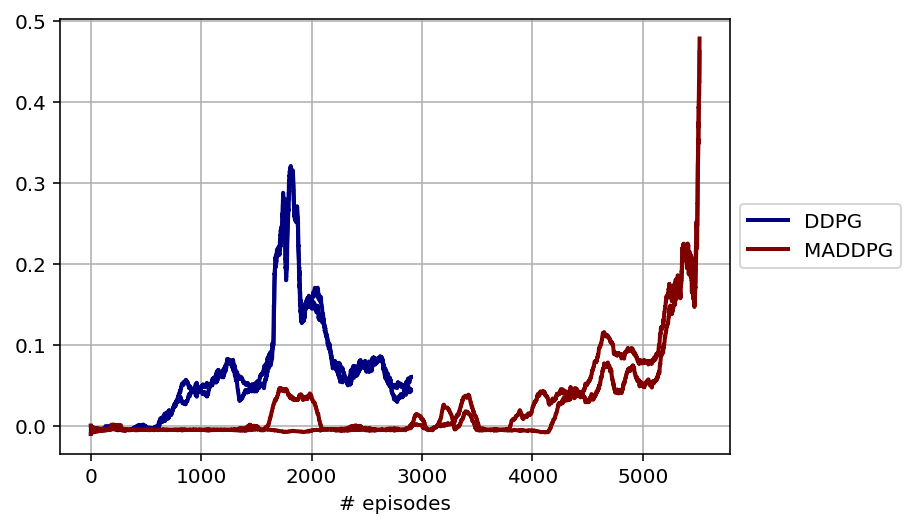

In [34]:
folders = ["trained/ddpg", "trained/maddpg_no_double"]
           
labels = ["DDPG", "MADDPG"]
train_time = "last"

def show_plots(data, labels=None, max_episodes=None, only_mean=False, legend_outside=False):
    if max_episodes == None:
        # Find max number of episodes
        max_episodes = 0
        for i in range(len(data)):
            if len(data[i]["mean_scores"]) > max_episodes:
                max_episodes = len(data[i]["mean_scores"])

    fig, ax = plt.subplots()
    cmap = plt.cm.get_cmap("jet", max([len(data), 2]))
    for i in range(len(data)):
        if labels is not None:
            label = labels[i]
        else:
            label = None
        mean_score = data[i]["mean_scores"]
        score = data[i]["scores"]
        if len(np.array(score).shape) > 1:
            n_agents = np.array(score).shape[1]
        else:
            n_agents = 1
        if len(mean_score) < max_episodes:
            temp = np.nan * np.ones(())
            mean_score = np.concatenate(
                (mean_score, np.nan * np.ones((max_episodes-len(mean_score), n_agents)).squeeze()))
            score = np.concatenate(
                (score, np.nan * np.ones((max_episodes-len(score), n_agents)).squeeze()))
        if not only_mean:
            ax.plot(np.arange(1, max_episodes+1),
                    score, alpha=0.3, color=cmap(i))
        
        mean_score = np.array(mean_score)
        for j in range(mean_score.shape[1]):
            ax.plot(np.arange(1, max_episodes+1), mean_score[:,j],
                    label=label if j == 0 else None, color=cmap(i), linewidth=2)
    if labels is not None:
        if legend_outside:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        else:
            ax.legend()
    ax.set_xlabel("# episodes")
    ax.grid()
    

data = [load_agent(folder) for folder in folders]
show_plots(data, labels=labels, only_mean=True, legend_outside=True)
plt.savefig("DDPG vs MADDPG.png", dpi=100)




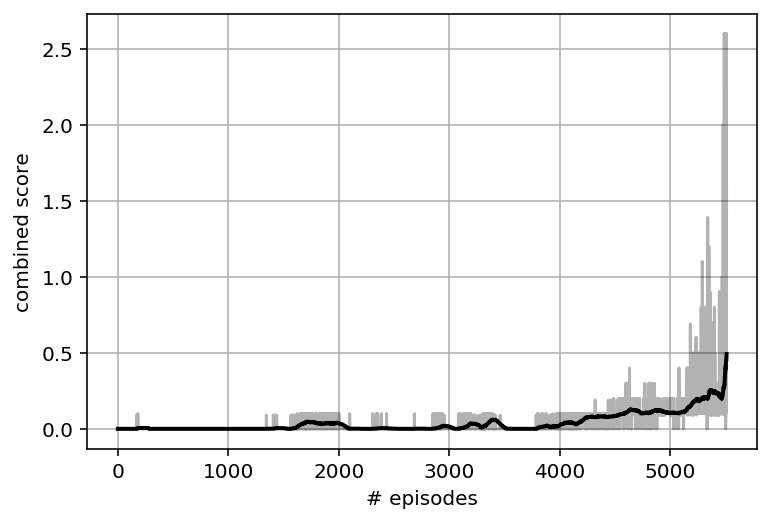

In [35]:

x = np.array(data[1]["scores"])
x = np.max(x, 1)
xs = np.zeros_like(x)
for i in range(len(x)):
    xs[i] = np.mean(x[np.max([0, i-100]):i])
    
fig, ax = plt.subplots()
ax.plot(x, alpha=0.3, color='k')    
ax.plot(xs, linewidth=2, color='k')
ax.set_xlabel("# episodes")
ax.set_ylabel("combined score")
ax.grid()
plt.savefig("MADDPG.png", dpi=100)


Save weights

In [25]:
folders = ["trained/maddpg_no_double"]
labels = ["MADDPG"]
train_time = "last"
data = [load_agent(folder) for folder in folders]

for i in range(2):
    torch.save(data[0]["actor_local_dict"][i], "agent_{}_actor_local.pth".format(i))
    torch.save(data[0]["actor_target_dict"][i], "agent_{}_actor_target.pth".format(i))
    torch.save(data[0]["critic_local_dict"][i], "agent_{}_critic_local.pth".format(i))
    torch.save(data[0]["critic_target_dict"][i], "agent_{}_critic_target.pth".format(i))
